In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline 

In [136]:
data_india = pd.read_json('india_.json')
data_idn = pd.read_json('idn_.json')
data_jerman = pd.read_json('germany_.json')
data_usa = pd.read_json('states_.json')

In [137]:
data_india.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,India,,,,,0,0,604641,confirmed,2020-07-01 00:00:00+00:00
1,India,,,,,0,0,625544,confirmed,2020-07-02 00:00:00+00:00
2,India,,,,,0,0,648315,confirmed,2020-07-03 00:00:00+00:00
3,India,,,,,0,0,673165,confirmed,2020-07-04 00:00:00+00:00
4,India,,,,,0,0,697413,confirmed,2020-07-05 00:00:00+00:00


In [138]:
data_idn.tail()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
149,Indonesia,,,,,0,0,522581,confirmed,2020-11-27 00:00:00+00:00
150,Indonesia,,,,,0,0,527999,confirmed,2020-11-28 00:00:00+00:00
151,Indonesia,,,,,0,0,534266,confirmed,2020-11-29 00:00:00+00:00
152,Indonesia,,,,,0,0,538883,confirmed,2020-11-30 00:00:00+00:00
153,Indonesia,,,,,0,0,1298608,confirmed,2020-12-01 00:00:00+00:00


In [139]:
(1298608-538883)/538883

1.4098143752911114

In [140]:
data_jerman.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Germany,,,,,0,0,195893,confirmed,2020-07-01 00:00:00+00:00
1,Germany,,,,,0,0,196370,confirmed,2020-07-02 00:00:00+00:00
2,Germany,,,,,0,0,196780,confirmed,2020-07-03 00:00:00+00:00
3,Germany,,,,,0,0,197198,confirmed,2020-07-04 00:00:00+00:00
4,Germany,,,,,0,0,197523,confirmed,2020-07-05 00:00:00+00:00


In [141]:
data_usa.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,United States of America,,,,,0,0,2693890,confirmed,2020-07-01 00:00:00+00:00
1,United States of America,,,,,0,0,2750517,confirmed,2020-07-02 00:00:00+00:00
2,United States of America,,,,,0,0,2801874,confirmed,2020-07-03 00:00:00+00:00
3,United States of America,,,,,0,0,2847553,confirmed,2020-07-04 00:00:00+00:00
4,United States of America,,,,,0,0,2898322,confirmed,2020-07-05 00:00:00+00:00


In [142]:
data_usa.columns

Index(['Country', 'CountryCode', 'Province', 'City', 'CityCode', 'Lat', 'Lon',
       'Cases', 'Status', 'Date'],
      dtype='object')

In [143]:
frames = [data_usa, data_idn, data_india, data_jerman]
df_all = pd.concat(frames)

In [144]:
df_all

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,United States of America,,,,,0,0,2693890,confirmed,2020-07-01 00:00:00+00:00
1,United States of America,,,,,0,0,2750517,confirmed,2020-07-02 00:00:00+00:00
2,United States of America,,,,,0,0,2801874,confirmed,2020-07-03 00:00:00+00:00
3,United States of America,,,,,0,0,2847553,confirmed,2020-07-04 00:00:00+00:00
4,United States of America,,,,,0,0,2898322,confirmed,2020-07-05 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
149,Germany,,,,,0,0,1038649,confirmed,2020-11-27 00:00:00+00:00
150,Germany,,,,,0,0,1052494,confirmed,2020-11-28 00:00:00+00:00
151,Germany,,,,,0,0,1055691,confirmed,2020-11-29 00:00:00+00:00
152,Germany,,,,,0,0,1069912,confirmed,2020-11-30 00:00:00+00:00


In [145]:
df = df_all.pivot(index='Date', columns='Country', values='Cases') #membuat df baru dg negara menjadi columns 
countries = list(df.columns) 
covid = df.reset_index('Date') #membuat Date menjadi index
covid.set_index(['Date'], inplace=True) 
covid.columns = countries #untuk menghapus tulisan 'Country ' diatas Date

In [146]:
covid

,Germany,India,Indonesia,United States of America
Date,,,,
2020-07-01 00:00:00+00:00,195893,604641,57770,2693890
2020-07-02 00:00:00+00:00,196370,625544,59394,2750517
2020-07-03 00:00:00+00:00,196780,648315,60695,2801874
2020-07-04 00:00:00+00:00,197198,673165,62142,2847553
2020-07-05 00:00:00+00:00,197523,697413,63749,2898322
...,...,...,...,...
2020-11-27 00:00:00+00:00,1038649,9351109,522581,13199752
2020-11-28 00:00:00+00:00,1052494,9392919,527999,13355018
2020-11-29 00:00:00+00:00,1055691,9431691,534266,13495104


Text(2020-07-11 00:00:00+00:00, 15042652, 'Kasus Terkonfirmasi COVID-19 Berdasarkan Negara')

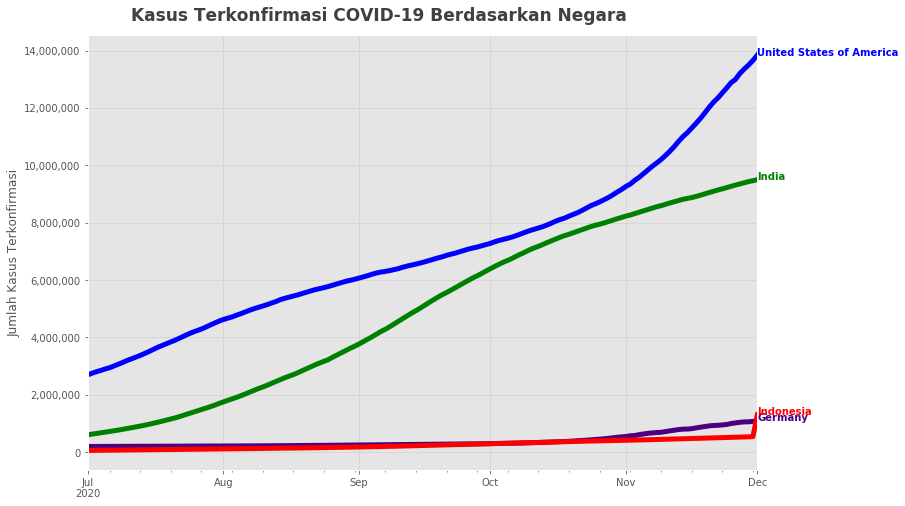

In [147]:
# Generating Colours and Style
colors = {'Germany':'indigo', 'India':'green', 'Indonesia':'red', 'United States of America':'blue'}
plt.style.use('ggplot')

# Creating the Visualization
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('')
plot.set_ylabel('Jumlah Kasus Terkonfirmasi')

# Assigning Colour
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

# Adding Labels
plot.text(x = covid.index[10], y = int(covid.max().max()+1200000), s = "Kasus Terkonfirmasi COVID-19 Berdasarkan Negara", fontsize = 17, weight = 'bold', alpha = .75)


# Dengan Normalisasi (Min-Max)

In [148]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
covid_m = covid.copy()
covid_m[['Germany','India','Indonesia','United States of America']] = scaler.fit_transform(covid_m[['Germany','India','Indonesia','United States of America']])

In [149]:
covid_m

,Germany,India,Indonesia,United States of America
Date,,,,
2020-07-01 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000
2020-07-02 00:00:00+00:00,0.000531,0.002350,0.001309,0.005079
2020-07-03 00:00:00+00:00,0.000987,0.004910,0.002357,0.009686
2020-07-04 00:00:00+00:00,0.001452,0.007704,0.003523,0.013783
2020-07-05 00:00:00+00:00,0.001814,0.010430,0.004819,0.018337
...,...,...,...,...
2020-11-27 00:00:00+00:00,0.937661,0.983327,0.374594,0.942334
2020-11-28 00:00:00+00:00,0.953066,0.988027,0.378961,0.956261
2020-11-29 00:00:00+00:00,0.956623,0.992386,0.384011,0.968826


Text(2020-07-03 00:00:00+00:00, 1, 'Kasus Terkonfirmasi COVID-19 Berdasarkan Negara (Normalisasi Min-Max)')

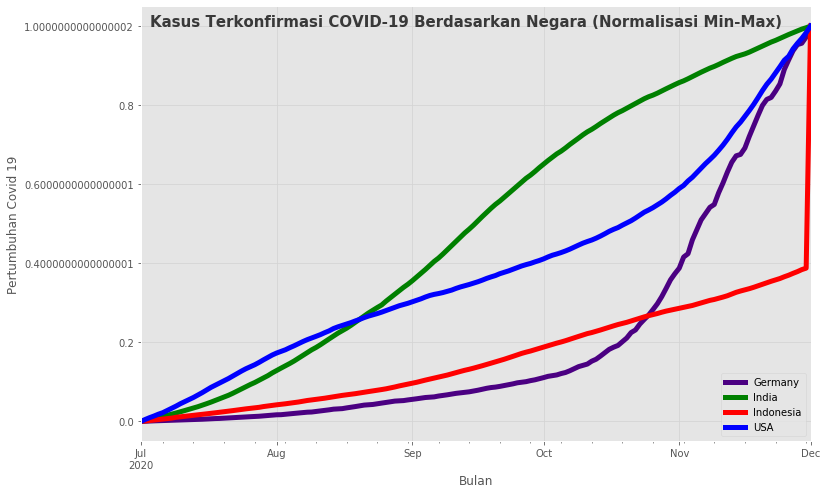

In [150]:
# Generating Colours and Style
colors = {'Germany':'indigo', 'India':'green', 'Indonesia':'red', 'United States of America':'blue'}
plt.style.use('ggplot')

# Creating the Visualization
plot = covid_m.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Bulan')
plot.set_ylabel('Pertumbuhan Covid 19')

# Assigning Colour
plot.legend(["Germany","India","Indonesia","USA"], loc ="lower right") 

# Adding Labels
plot.text(x = covid_m.index[2], y = int(covid_m.max().max()), s = "Kasus Terkonfirmasi COVID-19 Berdasarkan Negara (Normalisasi Min-Max)", fontsize = 15, weight = 'bold', alpha = .75)


## Appendix - Various normalization method

### Per populasi, 100,000 Jiwa 

In [151]:
populations = {'Germany': 83783942 , 'India': 1380004385 , 'Indonesia': 275559727, 'United States of America':331002651 }
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]

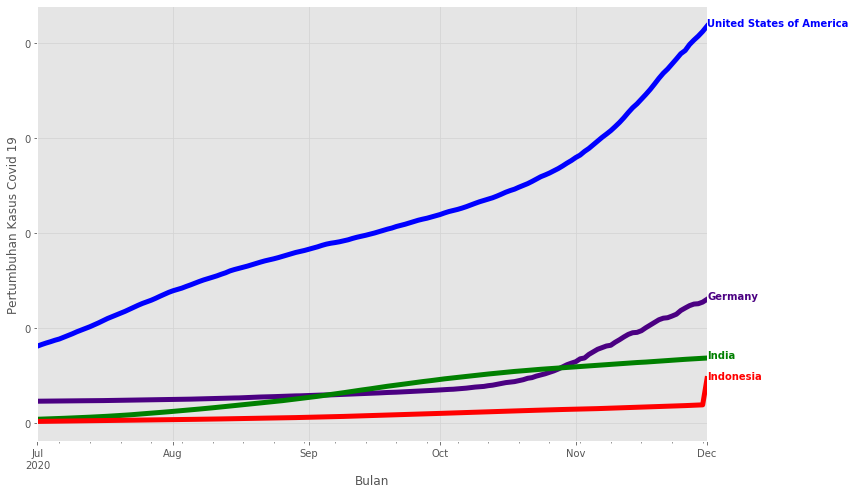

In [152]:
# Generating Colours and Style
colors = {'Germany':'indigo', 'India':'green', 'Indonesia':'red', 'United States of America':'blue'}
plt.style.use('ggplot')

# Creating the Visualization
plot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Bulan')
plot.set_ylabel('Pertumbuhan Kasus Covid 19')

# Assigning Colour
for country in list(colors.keys()):
    plot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold') #nama negara 

# Adding Labels
#plot.text(x = covid.index[0], y = int(covid.max().max()), s = "Kasus Terkonfirmasi COVID-19 Perpopulasi", fontsize = 12, weight = 'bold', alpha = .75)


### Standard Scaler

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
covid_s = covid.copy()
covid_s[['Germany','India','Indonesia','United States of America']] = scaler.fit_transform(covid_s[['Germany','India','Indonesia','United States of America']])

Text(2020-07-04 00:00:00+00:00, 6, 'Kasus Terkonfirmasi COVID-19 Berdasarkan Negara (Normalisasi Standard Scaler)')

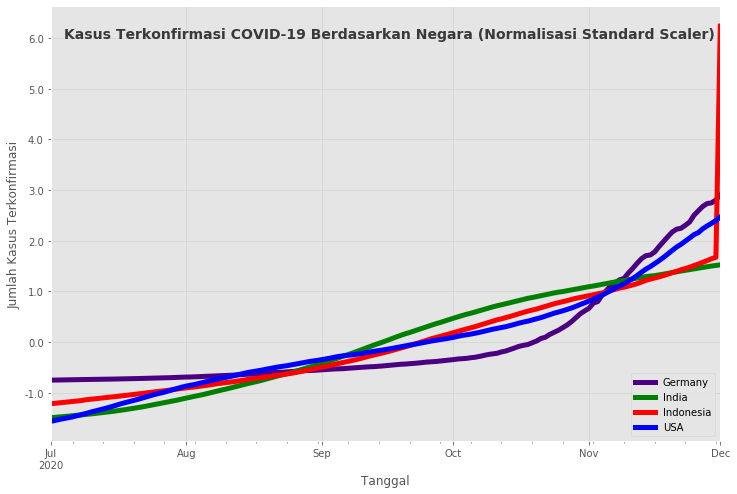

In [154]:
# Generating Colours and Style
colors = {'Germany':'indigo', 'India':'green', 'Indonesia':'red', 'United States of America':'blue'}
plt.style.use('ggplot')

# Creating the Visualization
plot = covid_s.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Tanggal')
plot.set_ylabel('Jumlah Kasus Terkonfirmasi')

# Assigning Colour
plot.legend(["Germany","India","Indonesia","USA"], loc ="lower right") 

# Adding Labels
plot.text(x = covid_s.index[3], y = int(covid_s.max().max()), s = "Kasus Terkonfirmasi COVID-19 Berdasarkan Negara (Normalisasi Standard Scaler)", fontsize = 14, weight = 'bold', alpha = .75)


### Robust Scaler

In [155]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
covid_r = covid.copy()
covid_r[['Germany','India','Indonesia','United States of America']] = scaler.fit_transform(covid_r[['Germany','India','Indonesia','United States of America']])

Text(2020-07-04 00:00:00+00:00, 4, 'Kasus Terkonfirmasi COVID-19 Berdasarkan Negara (Normalisasi Robust Scaler)')

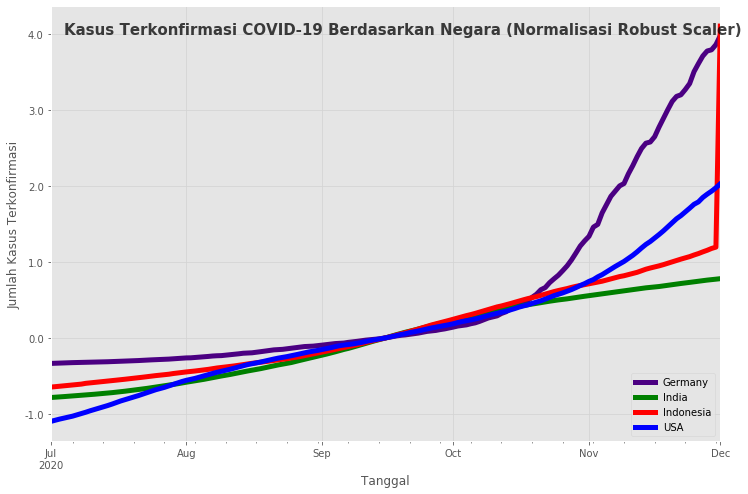

In [156]:
# Generating Colours and Style
colors = {'Germany':'indigo', 'India':'green', 'Indonesia':'red', 'United States of America':'blue'}
plt.style.use('ggplot')

# Creating the Visualization
plot = covid_r.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Tanggal')
plot.set_ylabel('Jumlah Kasus Terkonfirmasi')

# Assigning Colour
plot.legend(["Germany","India","Indonesia","USA"], loc ="lower right") 

# Adding Labels
plot.text(x = covid_r.index[3], y = int(covid_r.max().max()), s = "Kasus Terkonfirmasi COVID-19 Berdasarkan Negara (Normalisasi Robust Scaler)", fontsize = 15, weight = 'bold', alpha = .75)


### Normalizer (l1/l2) - rarely used

In [133]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
covid_I = covid.copy()
covid_I[['Germany','India','Indonesia','United States of America']] = scaler.fit_transform(covid_I[['Germany','India','Indonesia','United States of America']])

Text(2020-07-01 00:00:00+00:00, 1, 'Kasus Terkonfirmasi COVID-19 Berdasarkan Negara (Normalisasi Normalizer)')

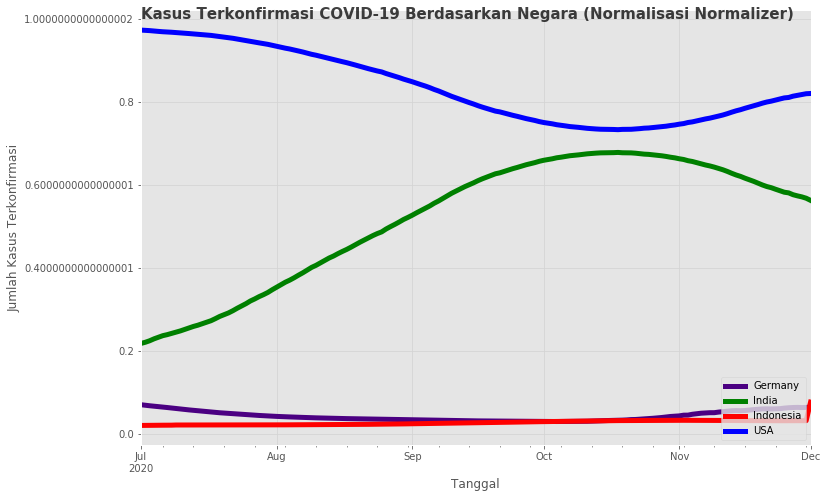

In [134]:
# Generating Colours and Style
colors = {'Germany':'indigo', 'India':'green', 'Indonesia':'red', 'United States of America':'blue'}
plt.style.use('ggplot')

# Creating the Visualization
plot = covid_I.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Tanggal')
plot.set_ylabel('Jumlah Kasus Terkonfirmasi')

# Assigning Colour
plot.legend(["Germany","India","Indonesia","USA"], loc ="lower right") 

# Adding Labels
plot.text(x = covid_I.index[0], y = int(covid_I.max().max())+1, s = "Kasus Terkonfirmasi COVID-19 Berdasarkan Negara (Normalisasi Normalizer)", fontsize = 15, weight = 'bold', alpha = .75)
